<a href="https://colab.research.google.com/github/Jandresol/neuro140_1/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

In [87]:
# Define model
model = nn.Sequential(
    nn.Linear(28 * 28, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

In [78]:
# Define a more flexible model
class ResNet(nn.Module):
  def __int__(self):
    super().__init__()
    self.l1 = nn.Linear(28 * 28, 64)
    self.l2 = nn.Linear(64, 64)
    self.l3 = nn.Linear(64, 10)
    self.do = nn.Dropout(0.1)

  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    do = self.do(h2 + h1)
    logits = self.l3(do)
    return logits

model = ResNet()

In [85]:
# Define optimiser
params = model.parameters()
optimiser = optim.SGD(params, lr=1e-2)

In [79]:
# Define my loss
loss = nn.CrossEntropyLoss()

In [80]:
# Train Val split
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)

In [84]:
# My training and validation loops
nb_epochs = 5
for epoch in range(nb_epochs):
  losses = list()
  accuracies = list()
  model.train()
  for batch in train_loader:
    x, y = batch

    #x: b * 1 * 28 * 28
    b = x.size(0)
    x = x.view(b, -1)

    # 1 forwards
    l = model(x) #1 : logits

    # 2 compute the objective function
    J = loss(l, y)

    # 3 cleaning the gradients
    model.zero_grad()
    # params.grad.zero_()

    # 4 accumulate the partial derivatives of J
    J.backward()

    # 5 step in the opposite direction of the gradient
    optimiser.step()
    # with torch.no_grad(): params = params - eta * params.grad

    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1)).float().mean())
  print(f'Epoch {epoch + 1}', end=', ')
  print(f'training loss {torch.tensor(losses).mean():.2f}', end= ', ')
  print(f'training accuracy: {torch.tensor(accuracies).mean():.2f}')

  losses = list()
  accuracies = list()
  model.eval
  for batch in val_loader:
    x, y = batch

    #x: b * 1 * 28 * 28
    b = x.size(0)
    x = x.view(b, -1)

    # 1 forwards
    with torch.no_grad():
      l = model(x) #1 : logits

    # 2 compute the objective function
    J = loss(l, y)

    losses.append(J.item())
    accuracies.append(y.eq(l.detach().argmax(dim=1)).float().mean())

  print(f'Epoch{epoch + 1}, validation loss: {torch.tensor(losses).mean():.2f}')

Epoch 1, training loss 2.31, training accuracy: 0.10
Epoch1, validation loss: 2.31
Epoch 2, training loss 2.31, training accuracy: 0.10
Epoch2, validation loss: 2.31
Epoch 3, training loss 2.31, training accuracy: 0.10
Epoch3, validation loss: 2.31
Epoch 4, training loss 2.31, training accuracy: 0.10
Epoch4, validation loss: 2.31
Epoch 5, training loss 2.31, training accuracy: 0.10
Epoch5, validation loss: 2.31


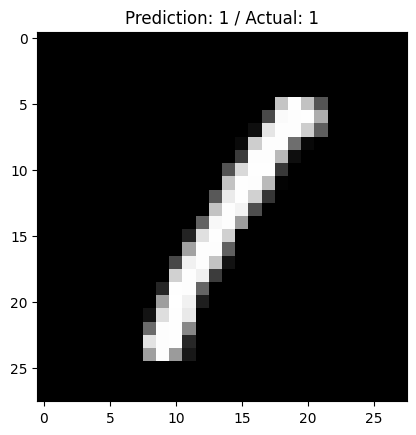

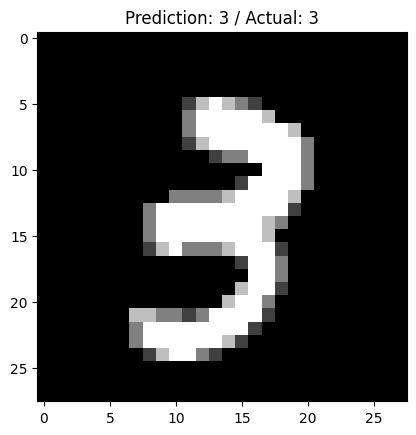

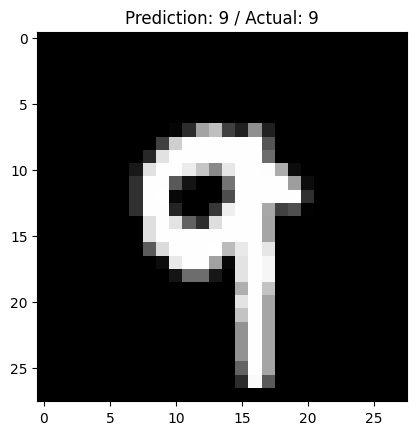

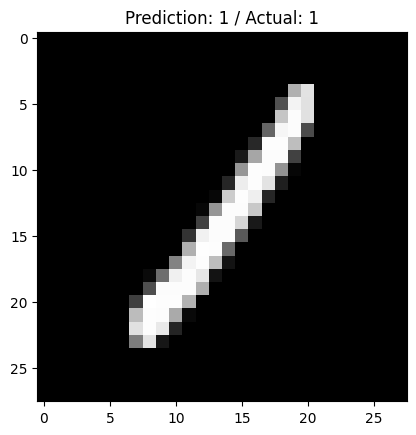

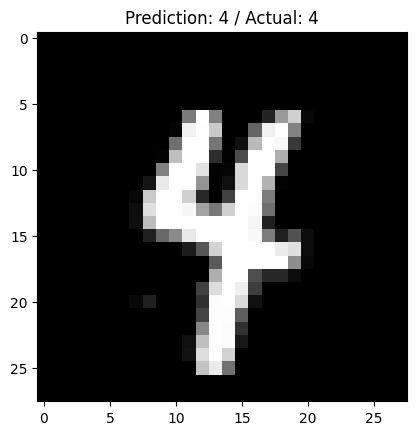

In [43]:
def display_images_with_predictions(model, data_loader, num_images=5):
    model.eval()

    with torch.no_grad():
        for i, (images, labels) in enumerate(data_loader):
            if i >= num_images:
                break

            # Flatten images
            images = images.view(images.size(0), -1)

            # Forward pass
            outputs = model(images)

            # Get predictions
            _, predictions = torch.max(outputs, 1)

            # Reshape images for display
            image = images[0].view(28, 28).numpy()

            # Display the image and prediction
            plt.imshow(image, cmap='gray')
            plt.title(f'Prediction: {predictions[0]} / Actual: {labels[0]}')
            plt.show()

# Use the display function with the validation loader
display_images_with_predictions(model, val_loader, num_images=5)
